In [ ]:
import tensorflow as tf

In [ ]:
! pip install numpy

In [ ]:
! pip install pandas

In [ ]:
! pip install seaborn

In [ ]:
! pip install matplotlib

In [ ]:
! pip install tensorflow

In [ ]:
! pip install keras

In [ ]:
pip install -U scikit-learn

In [ ]:

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion=keras.datasets.fashion_mnist

In [ ]:
fashion

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
(X_train,y_train),(X_test,y_test) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
# optimize the model with much higher accuracy,
#as they are currently ranging from 0 to 255 corresponding to rgb values
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float')/255

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_name = ['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot']
class_name

['T-shirt/top',
 'Trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [ ]:

y_train[0]

9

In [ ]:
class_name[y_train[0]]

'ankle boot'

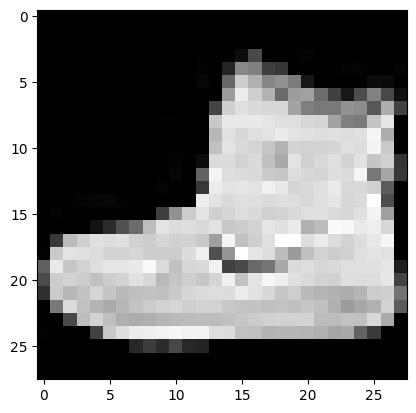

In [ ]:
plt.imshow(X_train[0],cmap='gray')

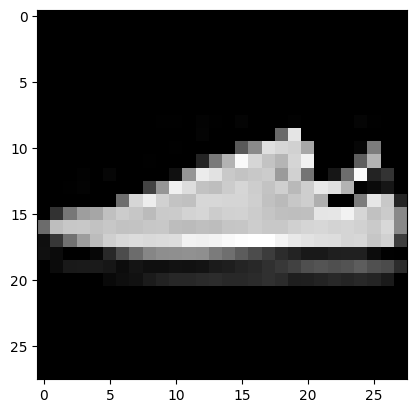

In [ ]:
plt.imshow(X_train[6],cmap='gray')


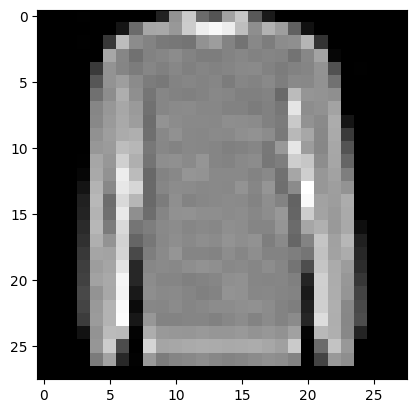

In [ ]:

plt.imshow(X_train[45],cmap='gray')

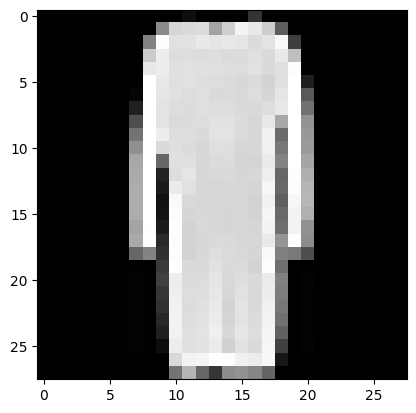

In [ ]:
plt.imshow(X_train[25],cmap='gray')


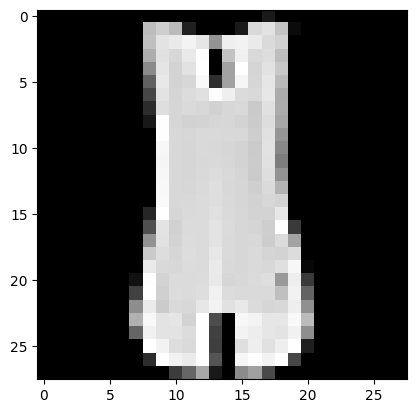

In [ ]:

plt.imshow(X_train[4],cmap='gray')


The label for this image iscoat


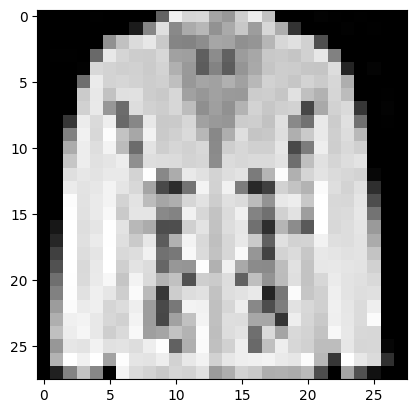

In [ ]:
from random import randrange
item=randrange(60000)

plt.imshow(X_train[item],cmap='gray')
print("The label for this image is" + str(class_name[y_train[item]]))

In [ ]:
SNN=keras.models.Sequential()
# in the first layer, we need 28*28 = 784 nodes
SNN.add(keras.layers.Flatten(input_shape=[28,28]))
SNN.add(keras.layers.Dense(300,activation="relu")) # Rectified Linear Unit: The prontal after Dense should be number of nodes of inputs
SNN.add(keras.layers.Dense(100,activation="relu"))# Second layer added
SNN.add(keras.layers.Dense(10,activation="softmax"))# Output layer with 10 outputs that we need to classify

In [ ]:
SNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
SNN.layers

In [ ]:
hidden1 = SNN.layers[1]

In [ ]:
weights,biases = hidden1.get_weights()
biases
weights

array([[-0.05235072, -0.05250238,  0.02350076, ...,  0.04733786,
        -0.00493061,  0.03857148],
       [-0.07254674,  0.04775272,  0.07160237, ...,  0.04500961,
         0.02006765, -0.0096172 ],
       [ 0.03007937, -0.0263554 , -0.01874221, ..., -0.01638946,
        -0.00817274,  0.00473432],
       ...,
       [-0.04927569, -0.0120519 ,  0.00439729, ...,  0.044825  ,
         0.00483447, -0.02371659],
       [-0.02006593, -0.00322378,  0.04212441, ..., -0.00523566,
        -0.01727264, -0.04270901],
       [-0.02893902, -0.03847729,  0.04224294, ..., -0.07334528,
         0.01986757,  0.06923835]], dtype=float32)

In [ ]:
SNN.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history=SNN.fit(X_train,y_train,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7070 - accuracy: 0.7670
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4792 - accuracy: 0.8342
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4337 - accuracy: 0.8497
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4085 - accuracy: 0.8577
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3866 - accuracy: 0.8644
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3721 - accuracy: 0.8697
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3579 - accuracy: 0.8739
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3470 - accuracy: 0.8773
Epoch 9/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3366 - accuracy: 0.8799
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.327

In [ ]:
SNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3538 - accuracy: 0.8724


[0.3537735342979431, 0.8723999857902527]

<Axes: >

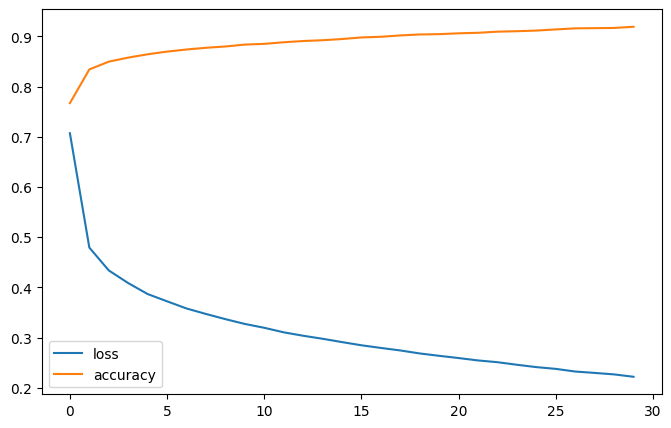

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [ ]:
predict_y=SNN.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predict_y

array([[3.0897236e-06, 2.5127477e-07, 3.4000313e-06, ..., 5.4993732e-03,
        2.5570579e-04, 9.9291885e-01],
       [1.8377468e-05, 1.2493797e-09, 9.9965227e-01, ..., 1.3172780e-11,
        3.1575805e-08, 3.5010408e-12],
       [3.8780536e-06, 9.9999541e-01, 1.6225272e-08, ..., 2.6048023e-11,
        3.0889784e-09, 9.7957900e-12],
       ...,
       [5.9585660e-03, 7.4258047e-08, 2.6265513e-03, ..., 5.6615245e-06,
        9.9011219e-01, 2.7997219e-08],
       [5.1694892e-06, 9.9990982e-01, 1.2980579e-06, ..., 5.1236857e-08,
        1.3560067e-07, 4.4856816e-07],
       [8.5754573e-06, 3.0385752e-06, 8.0157668e-05, ..., 3.8798517e-03,
        3.5182366e-04, 8.9414068e-05]], dtype=float32)

In [ ]:
predicted_class=np.argmax(predict_y,axis=1)

In [ ]:
predicted_class

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
np.array(class_name)[predicted_class]

array(['ankle boot', 'pullover', 'Trouser', ..., 'bag', 'Trouser',
       'sandal'], dtype='<U11')

the prediction is sneaker


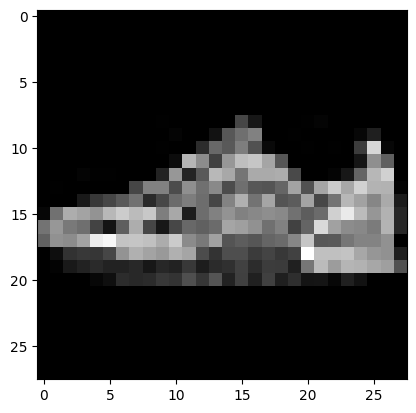

In [ ]:
item=randrange(10000)
plt.imshow(X_test[item], cmap='gray')
print("the prediction is "+ str(class_name[predicted_class[item]]))

In [ ]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,predicted_class)

([<matplotlib.axis.YTick at 0x7f0b1f5c9d80>,
 [Text(0, 0.5, 'T-shirt/top'),
  Text(0, 1.5, 'Trouser'),
  Text(0, 2.5, 'pullover'),
  Text(0, 3.5, 'dress'),
  Text(0, 4.5, 'coat'),
  Text(0, 5.5, 'sandal'),
  Text(0, 6.5, 'shirt'),
  Text(0, 7.5, 'sneaker'),
  Text(0, 8.5, 'bag'),
  Text(0, 9.5, 'ankle boot')])

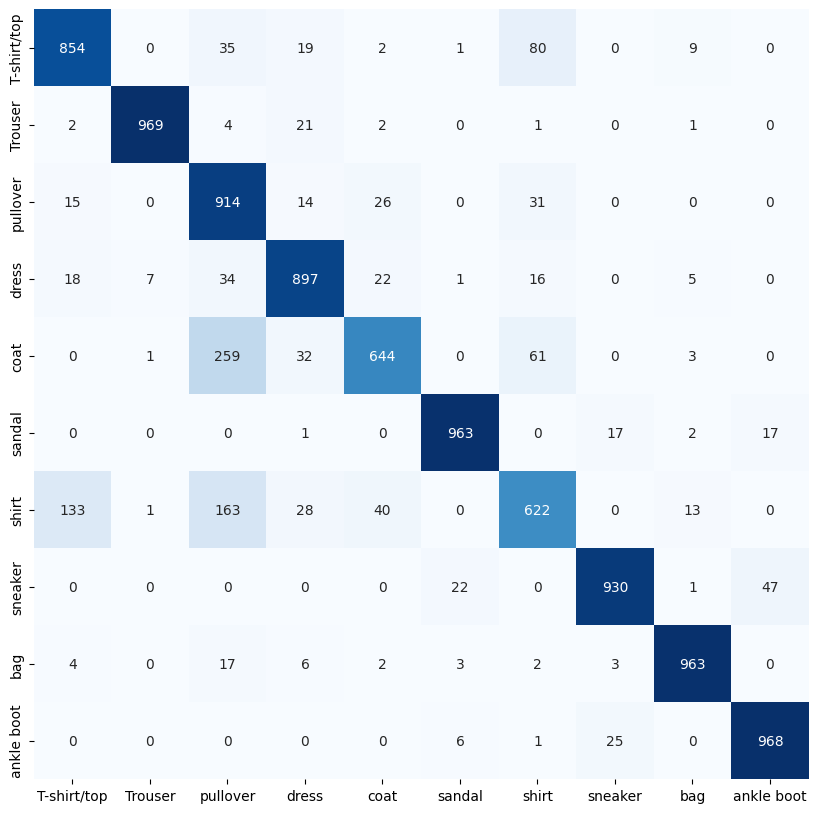

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(np.arange(10)+0.5,['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot'])
plt.yticks(np.arange(10)+0.5,['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot'])